# Exploring extended data set on lab measurements of myocardial ischemia

In [2]:
# Description: required imports for notebook
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Description: Load dataset
mi_data_df = pd.read_csv("../data/raw/myocardial_ischemia_1929_fixed.csv", sep=';')

c:\users\i0325777\appdata\local\continuum\miniconda3\lib\site-packages\IPython\core\interactiveshell.py:3018: DtypeWarning: Columns (7,12,71,72,77,81,116,118,144,146,154,207,209,210,214,229,237,241,245,247,249,250,252,253,256,257,258,262,266,267,276,281,283,290,291,295,297,298,302,303,305,309,312,314,320,321,323,330,335,336,338,341,347,352,355,358,359,360,363,365,369,370,373,374,376,377,378,379,380,381,384,385,386,387,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,410,411,412,413,414,415,416,417,422,427,428,431,433,434,439,444,445,446,447,448,449,450,451,452,453,454,457,475,476,477,478,479,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,500,512,513,517,518,519,520,521,522,523,524,526,527,529,530,531,532,533,534,535,536,537,538,539,540,541,542,545,547,548,549,550,551,552,553,555,556,557,558,559,563,565,566,571,574,575,577,579,585,586,587,588,593,600,605,606,609,610,614,617,618,619,622,623,628,631,640,650,665,666,667,671,674,675,676,677,678,68

In [34]:
mi_data_df.shape

(36680, 1929)

In [17]:
# Description: Sanity check: how well does pandas represent the data
if True:
    mi_data_df.to_csv("../data/interim/raw_heart_data_fixed_commata.csv", sep=',')

In [55]:
# Description: Number of records (rows) vs. number of lab measurements (columns)
rows_qty = mi_data_df.shape[0]
columns_qty = mi_data_df.shape[1]
mi_data_df.shape

(36680, 1929)

In [ ]:
# Description: Sanity check header of data set

mi_data_df

In [ ]:
list(mi_data_df.columns)

In [12]:
for name in list(mi_data_df.columns):
    if "Diag" in name:
        print(name)

Diagnose/Fragestellung - ID:50790
Diagnose - ID:52300


In [22]:
mi_data_df.dropna(axis="rows", subset=["main_diag"], inplace=True)

In [23]:
mi_data_df["main_diag"]

4         P558
6         T840
7         M960
8         M511
9         J060
10        J210
11        J129
12       S4212
13        M511
14        O721
15        Z380
16        M511
17        Q181
18        R040
19         N10
20        L120
21        N764
22        J205
23        C402
24         O80
25        H330
26        Z380
27       S5259
28        T830
29        M960
31       T8610
32        R900
33       M7268
38        P220
39       C9200
         ...  
36181     Z380
36182     P201
36183     L038
36184     N764
36185     D134
36186    G2011
36187     H160
36188      C01
36189     C031
36190     E040
36191     C509
36192    S7201
36193     I484
36194     I269
36195     J039
36196    R5080
36197     H341
36198     I260
36199     R040
36200    S8353
36201     I495
36202     G248
36203     Z390
36204     Z390
36206     T175
36207     N201
36208     B340
36210     R073
36211     N832
36222     K610
Name: main_diag, Length: 26738, dtype: object

In [16]:
np.sum(mi_data_df["Diagnose/Fragestellung - ID:50790"].isnull())

36676

In [59]:
# Description: Inspection of the distribution of lab measurements across rows
measurement_counts = mi_data_df.count().sort_values()

In [60]:
measurement_counts_df = measurement_counts.to_frame()
measurement_counts_df.columns = ["Counts"]
measurement_counts_df.head(20)

,Counts
c-Kit D816V - ID:3140,1
"NPM1 Typ A, Verlauf - ID:32910",1
JAK2 Exon 12 - ID:90104,1
Nukleosomen - ID:16170,1
Brushit - ID:5329,1
Natriumhydrogenurat - ID:5345,1
Abk My-/Ery Komment. - ID:28251,1
Calcium - ID:1007,1
Anorg.Phosphat - ID:1011,1
Chlorid - ID:1315,1


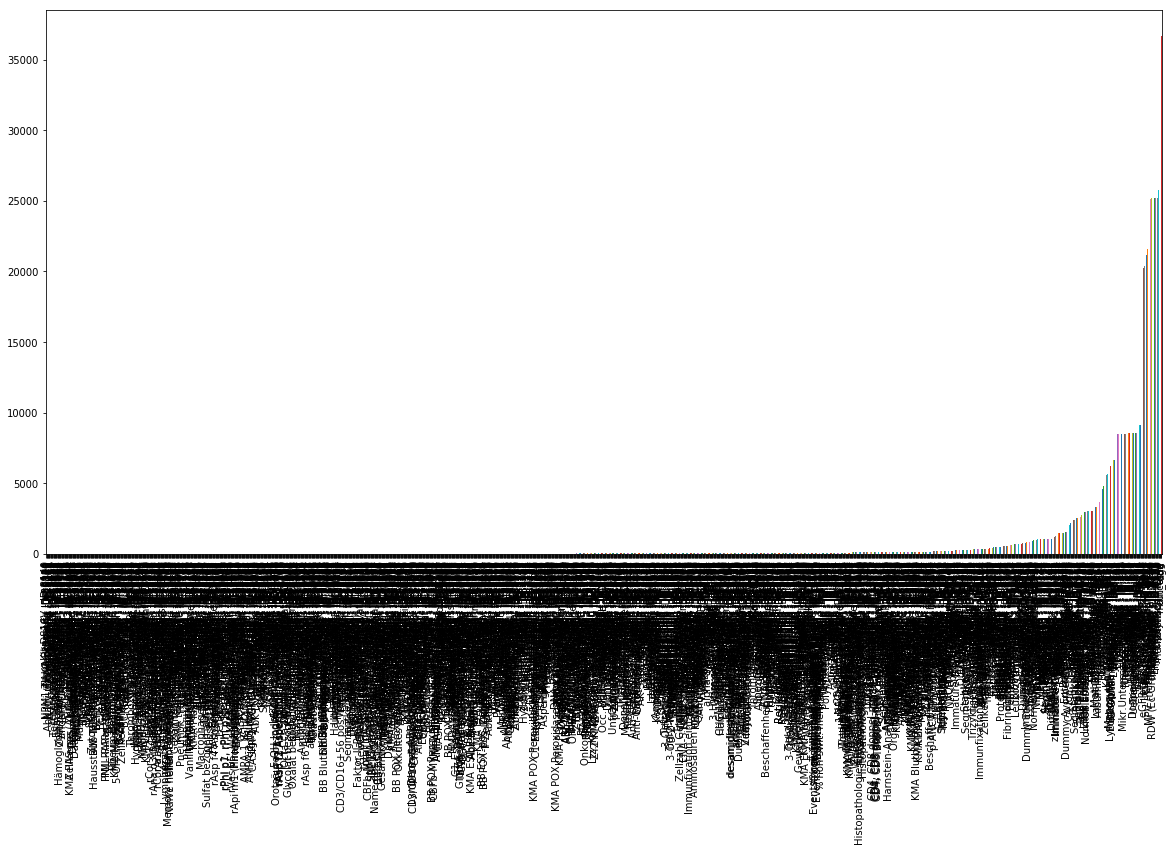

In [61]:
measurement_counts.plot.bar(figsize=(20,10))

# Observation: Most measurements are only performed a few times. Thus, it would not be wise to impute the full matrix.

Magic threshold quantity is 100
Amount (percentage) of original columns: 486 (25.194401244167963%)


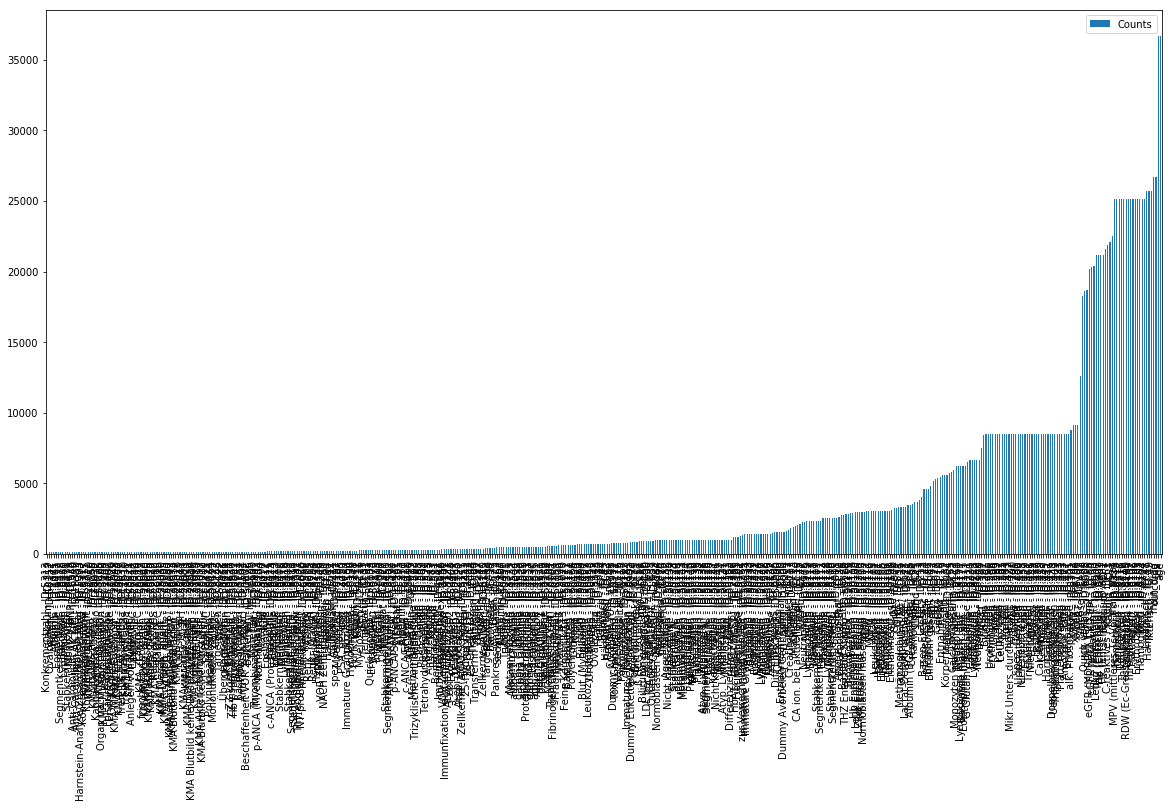

In [63]:
# Description: Only plot the number of measurements with counts above threshold
magic_threshold = 100
print("Magic threshold quantity is " + str(magic_threshold))
thresholded_measurement_qty_df = measurement_counts_df.loc[measurement_counts_df["Counts"] >= magic_threshold]
print("Amount (percentage) of original columns: " + str(thresholded_measurement_qty_df.shape[0]) + " ("+ str(thresholded_measurement_qty_df.shape[0]/columns_qty * 100) + "%)")
thresholded_measurement_qty_df.plot.bar(figsize=(20, 10))
# Observation: 

In [64]:
# Description: Only plot the number of measurements with count percentage above threshold
magic_threshold_percentage = 0.5
print("Magic threshold percentage is " + str(magic_threshold_percentage = 0.5
*rows_qty))
thresholded_measurement_qty_df = measurement_counts_df.loc[measurement_counts_df["Counts"]/rows_qty >= magic_threshold_percentage]
print("Amount (percentage) of original columns: " + str(thresholded_measurement_qty_df.shape[0]) + " ("+ str(thresholded_measurement_qty_df.shape[0]/columns_qty * 100) + "%)")
thresholded_measurement_qty_df.plot.bar(figsize=(20, 10))
# Observation: 

TypeError: 'magic_threshold_percentage' is an invalid keyword argument for str()